In [523]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [524]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [525]:
from datetime import datetime

In [526]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [527]:
%matplotlib inline

In [528]:
# assert np.any([[6,2]])

In [529]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [530]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度

filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      #  日均成交量
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv'            # 非流动性因子（自算）
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' #市值调整换手率
filenameDDA = 'Own_Factor_DDA-1d.csv' # 股票每日成交额(前复权)

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均
filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)
# SIZE
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [531]:
#
filenameAroon = 'Aroon_Allstocks.csv' 
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异常波动率
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [532]:
filenameOwnSkewness = 'Own_Factor_Skewness_120d.csv'  # 250日偏度

In [533]:
# Constants
# some useful parameters
startTime =  datetime.strptime('20110101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [534]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF,'ADJPB':filenameADJPB}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDicFinance = {'CAPITALIZEDTODA':filenameCAPITALIZEDTODA, 'CASHRATIO':filenameCASHRATIO, 'CASHTOLIQDEBT':filenameCASHTOLIQDEBT,\
                     'OCFTODEBT':filenameOCFTODEBT,'PROFITTOOPTTM':filenamePROFITTOOPTTM}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW,'MACD':filenameMACD}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ,'VOLUME':filenameVOLUME,\
                  'OWNILLIQ':filenameOWNILLIQ,'ADJTURNOVER':filenameADJTURNOVER,'DDA':filenameDDA}
filenameVolatility = {'VOLATILITY':filenameOwnVol}

In [535]:
filenameTest = {'PB':filenamePB, 'YOYGR':filenameYOYGR,'ILLIQ':filenameILLIQ,'TURNOVER_1M':filenameTURNOVER1M,\
                'OWNILLIQ':filenameOWNILLIQ,'MOM_1M':filenameMOM1M,'CASHRATIO':filenameCASHRATIO,'ABOVE20MA':filenameAbove20,\
               'OWNVOL':filenameOwnVol}

In [536]:
filename7factor = {'PB':filenamePB,'YOYGR':filenameYOYGR,'OCFTODEBT':filenameOCFTODEBT,'MOM_1M':filenameMOM1M,
                  'VOLATILITY':filenameOwnVol,'DDA20':filenameDDA20,'OWNILLIQ':filenameOWNILLIQ,
                  'IDIVOL':filenameIDIVOL,'ADJTOV20':filenameADJTOV20,'ADJTOVD20':filenameADJTOVD20}

In [537]:
filenameDict = filename7factor

In [538]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

In [539]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [540]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [541]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime , endTime))

In [542]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [543]:
map(lambda x: x.date().strftime("%Y%m%d"), endOfMonthList)

['20110131',
 '20110228',
 '20110331',
 '20110429',
 '20110531',
 '20110630',
 '20110729',
 '20110831',
 '20110930',
 '20111031',
 '20111130',
 '20111230',
 '20120131',
 '20120229',
 '20120330',
 '20120427',
 '20120531',
 '20120629',
 '20120731',
 '20120831',
 '20120928',
 '20121031',
 '20121130',
 '20121231',
 '20130131',
 '20130228',
 '20130329',
 '20130426',
 '20130531',
 '20130628',
 '20130731',
 '20130830',
 '20130930',
 '20131031',
 '20131129',
 '20131231',
 '20140130',
 '20140228',
 '20140331',
 '20140430',
 '20140530',
 '20140630',
 '20140731',
 '20140829',
 '20140930',
 '20141031',
 '20141128',
 '20141231',
 '20150130',
 '20150227',
 '20150331',
 '20150430',
 '20150529',
 '20150630',
 '20150731',
 '20150831',
 '20150930',
 '20151030',
 '20151130',
 '20151231',
 '20160129',
 '20160229',
 '20160331',
 '20160429',
 '20160531',
 '20160630',
 '20160729',
 '20160831',
 '20160930',
 '20161031',
 '20161130',
 '20161230',
 '20170126',
 '20170228']

In [544]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = True)

In [545]:
activeReturnData.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300630.SZ,603178.SH,603833.SH,601228.SH,603041.SH,603303.SH,300635.SZ,300636.SZ,601200.SH,603385.SH
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,,,,,,,,,,,,,,,,
2016-09-30,-0.015340,-0.065675,0.003070,0.003943,0.024314,-0.039764,-0.126396,NaN,0.043678,-0.068367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,-0.012341,-0.032365,-0.057274,-0.011094,-0.019034,-0.013634,-0.075723,NaN,0.035110,0.058965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,-0.043033,-0.035257,-0.037238,-0.063748,-0.038444,-0.054986,-0.054893,NaN,0.112614,-0.222112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,-0.023639,-0.011151,-0.029935,-0.097596,-0.047976,-0.066746,0.006394,NaN,-0.152855,0.012700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,-0.035865,-0.009663,-0.014336,0.048949,-0.022804,0.014344,-0.035865,NaN,-0.017492,-0.043145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [546]:
IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]

In [547]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00:00 189
2013-07-31 00:00:00 198
2013-08-30 00:00:00 195
2013-09-30 00:00:00 197
2013-10-31 00:00:00 204
2013-11-29 00:00:00 219
2013-12-31 00:00:00 206
2014-01-30 00:00:00 243
2014-02-28 00:00:00 266
2014-03-31 00:00:00 302
2014-04-30 00:00:00 283
2014-05-30 00:00:00 286
2014-06-30 00:00

In [548]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [549]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)

In [550]:
pValueofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [551]:
#  ---------All above are global variables --------

In [552]:
for i,j in filenameDict.iteritems():
    print i
    factorData = ff.getData(j, thresholdNum,startTime,endTime)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,neutralizedData,activeReturnData,i)

PB
OWNILLIQ
OCFTODEBT
MOM_1M
IDIVOL
VOLATILITY
ADJTOV20
ADJTOVD20
DDA20
YOYGR


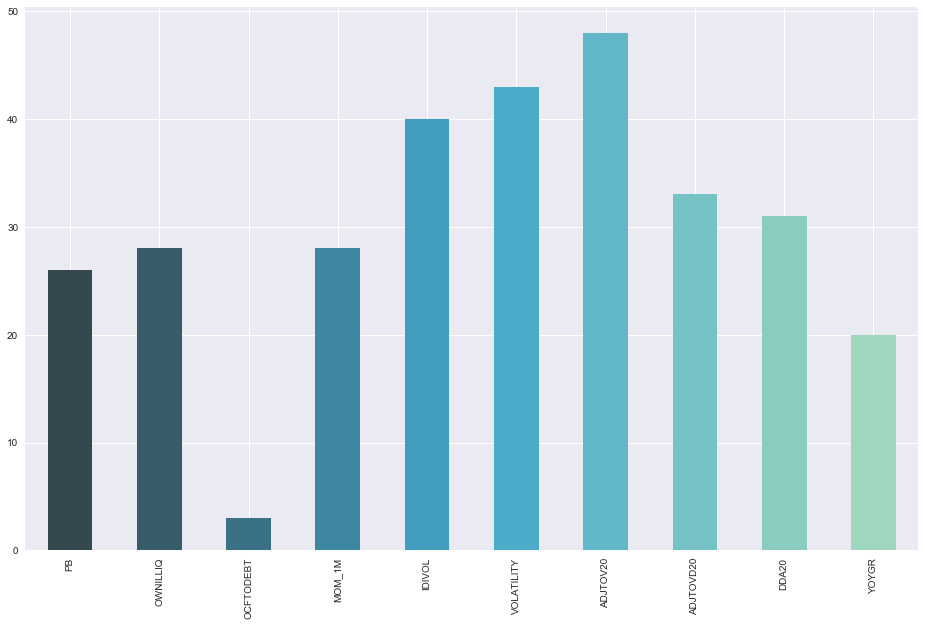

In [553]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",10))

In [554]:
ICFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,-0.042983,0.037597,0.010588,-0.074245,-0.104659,-0.063991,-0.120529,-0.079002,-0.047032,-0.001238
std,0.083747,0.096147,0.062463,0.094533,0.089170,0.128763,0.081130,0.080276,0.098242,0.093990
min,-0.216614,-0.202500,-0.378397,-0.318880,-0.319939,-0.298300,-0.299950,-0.267388,-0.268151,-0.253379
25%,-0.115947,-0.019538,-0.011674,-0.123373,-0.145939,-0.168747,-0.173159,-0.136968,-0.116359,-0.065275
50%,-0.031490,0.036989,0.010595,-0.066229,-0.099516,-0.073353,-0.108383,-0.083238,-0.057260,0.000289
75%,0.018285,0.092906,0.040528,-0.014102,-0.058255,0.019041,-0.070474,-0.014661,0.026985,0.058704
max,0.135154,0.258070,0.201249,0.113821,0.077877,0.199801,0.082000,0.078154,0.197918,0.201157


In [555]:
# Factors with positive IC
Above0df = ICFactor.astype(float)[ICFactor.astype(float)>0].describe()
Above0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
count,27.000000,53.000000,44.000000,15.000000,10.000000,23.000000,5.000000,14.000000,26.000000,37.000000
mean,0.041634,0.081962,0.038718,0.047321,0.036352,0.089649,0.042545,0.032170,0.059530,0.070451
std,0.033496,0.066102,0.038357,0.035107,0.023219,0.063524,0.026914,0.027107,0.048131,0.057270
min,0.001965,0.003007,0.000461,0.000773,0.000789,0.003119,0.016401,0.001424,0.001403,0.000289
25%,0.016692,0.027302,0.016345,0.017641,0.022675,0.040614,0.018165,0.008260,0.021903,0.029142
50%,0.030328,0.066514,0.035886,0.042635,0.032385,0.078172,0.047180,0.028324,0.047022,0.058704
75%,0.070758,0.123493,0.041836,0.072366,0.047072,0.149148,0.048982,0.050300,0.086475,0.086791
max,0.135154,0.258070,0.201249,0.113821,0.077877,0.199801,0.082000,0.078154,0.197918,0.201157


In [556]:
# Factors with negative IC
Below0df = ICFactor.astype(float)[ICFactor.astype(float)<0].describe()
Below0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
count,46.000000,20.000000,29.000000,58.000000,63.000000,50.000000,68.000000,59.000000,47.000000,36.000000
mean,-0.092649,-0.079971,-0.032092,-0.105684,-0.127042,-0.134665,-0.132519,-0.105381,-0.105981,-0.074918
std,0.061285,0.055068,0.068142,0.078042,0.073752,0.079835,0.069996,0.064374,0.062280,0.061502
min,-0.216614,-0.202500,-0.378397,-0.318880,-0.319939,-0.298300,-0.299950,-0.267388,-0.268151,-0.253379
25%,-0.126404,-0.115516,-0.030305,-0.132494,-0.159806,-0.193781,-0.178253,-0.145200,-0.136351,-0.104708
50%,-0.103246,-0.061535,-0.016217,-0.084099,-0.117815,-0.133770,-0.114181,-0.103939,-0.097086,-0.066099
75%,-0.039642,-0.038640,-0.008572,-0.054631,-0.074390,-0.069473,-0.084574,-0.054171,-0.064500,-0.023243
max,-0.000175,-0.005295,-0.000424,-0.000988,-0.012765,-0.011248,-0.006350,-0.001099,-0.005230,-0.005522


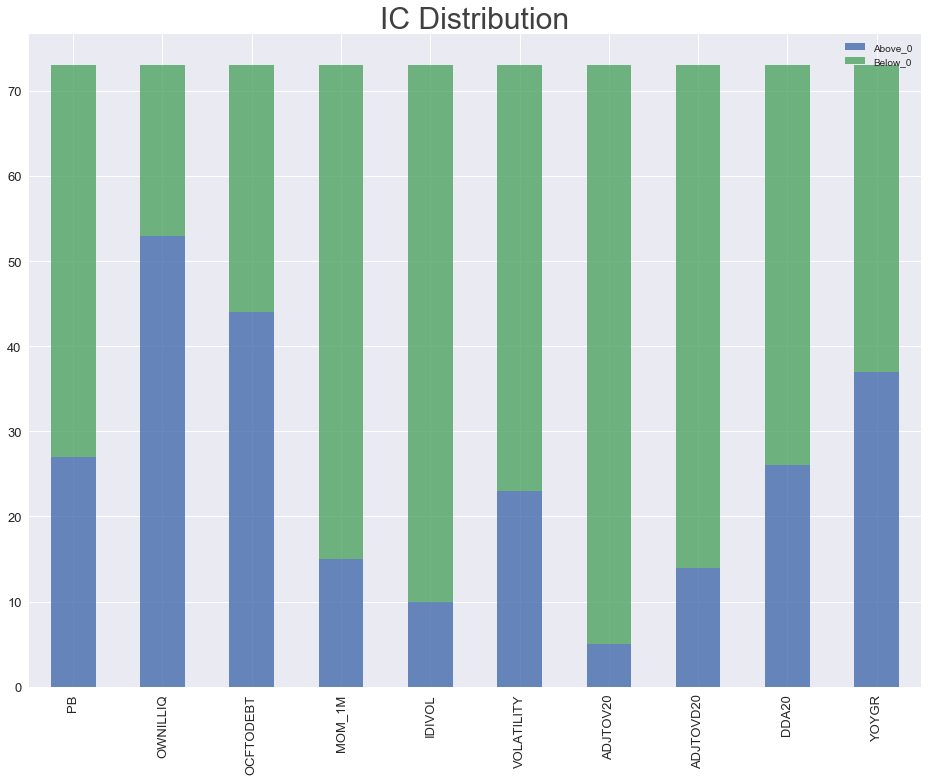

In [557]:
# show the amount of Negative IC and Positive IC in same figure
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
totaldf = pd.DataFrame({ 'Above_0':Above0df.loc['count'].values, 'Below_0':Below0df.loc['count'].values},index = Above0df.columns)
totaldf.plot(kind='bar',ax=ax, stacked =True,alpha=0.84,title ='IC Distribution',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.88, fontsize=30)

In [558]:
returnofFactor

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2011-01-31,0.00494884,-0.0114236,-0.000593619,-0.00803227,-0.000280226,0.0179463,-0.00606642,-0.00358368,-0.00817338,-0.00156756
2011-02-28,-0.00737529,-0.0173643,-0.000260837,-0.000299739,-0.0224472,-0.0180779,-0.0253712,-0.0109842,-0.0105962,0.00229218
2011-03-31,-0.00213997,-0.00633985,-0.00334536,0.0035274,-0.000833576,-0.0118902,0.00638051,-0.00665747,-0.010188,0.0046867
2011-04-29,0.000880386,-0.00127599,0.00292104,0.00234908,-0.00272149,-0.00404133,-0.00382746,-0.000741765,-0.00139403,0.000856869
2011-05-31,0.00176061,0.00166803,-0.000290825,-0.0143278,0.00026819,0.0144854,-0.0120352,-0.00322406,0.0011733,0.00113973
2011-06-30,0.00426134,0.0149943,-0.00129648,-0.0122488,-0.0162058,-0.0109159,-0.0407951,-0.00885544,-0.0155791,0.000442497
2011-07-29,-7.70491e-05,0.0176059,-0.00219257,0.00139685,-0.016653,-0.00592629,-0.0509252,-0.011706,-0.0100775,0.000230229
2011-08-31,-0.0103591,0.00771919,-0.000582976,-0.00396138,-0.00700727,-0.00396325,-0.027104,-0.00670364,-0.0138261,0.00621825
2011-09-30,-0.00322587,-0.00226184,-0.000806483,-0.00509315,0.00549753,-0.000183277,0.00840259,0.000323857,0.004738,-0.00389251
2011-10-31,0.00755778,0.0153431,0.000667794,-0.00675081,-0.0137325,0.0012987,-0.0431199,-0.015898,-0.0157071,0.000617516


In [559]:
ICFactor.iloc[-1] > ICFactor.mean()

PB            False
OWNILLIQ      False
OCFTODEBT      True
MOM_1M         True
IDIVOL         True
VOLATILITY    False
ADJTOV20       True
ADJTOVD20      True
DDA20          True
YOYGR         False
dtype: bool

In [560]:
ICFactorTosave = ICFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)
#ICFactorTosave.to_csv((path+'ICfactorWeight8factorsPB.csv'))

In [561]:
ReturnTosave = returnofFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)

In [562]:
ReturnTosave.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,-0.001470,0.079903,0.060058,0.044543,-0.095746,-0.246182,-0.154950,-0.153414,-0.129265,0.034468
2016-10-31,0.094945,0.107081,-0.029227,-0.178962,-0.103957,0.099050,-0.043192,-0.138540,-0.094231,-0.110815
2016-11-30,0.010568,0.059524,0.028798,-0.069624,-0.167200,-0.223568,-0.171097,-0.127150,-0.121547,-0.020925
2016-12-30,0.046799,0.074089,0.035646,0.143546,0.088618,-0.167359,-0.071905,0.092839,-0.241393,-0.037806
2017-01-26,-0.038785,-0.007255,0.017890,-0.127031,-0.153109,-0.167476,-0.181299,-0.148563,-0.131149,0.027444


In [583]:
# calculate correlation between two factors
turnOver = pd.read_csv(path+filenameADJTOV20,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
illq = pd.read_csv(path+filenameOwnVol ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(turnOver,illq, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,74.000000,74.000000
mean,0.363998,0.383795
std,0.130772,0.083264
min,0.074028,0.209564
25%,0.243830,0.334268
50%,0.402050,0.388966
75%,0.467400,0.444287
max,0.604413,0.575350


In [564]:
returnofFactor.cumsum().tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,-0.0788311,0.228901,-0.0114519,-0.51348,-0.64575,-0.332475,-0.760336,-0.495067,-0.434977,0.0228936
2016-10-31,-0.0781673,0.23264,-0.0096431,-0.517854,-0.656252,-0.346518,-0.771083,-0.503054,-0.442611,0.0215793
2016-11-30,-0.0762543,0.235668,-0.00818604,-0.511986,-0.65263,-0.353359,-0.774022,-0.499259,-0.452479,0.0200339
2016-12-30,-0.0792808,0.235102,-0.00679005,-0.521899,-0.664578,-0.366428,-0.788169,-0.510852,-0.462713,0.0221755
2017-01-26,-0.0803098,0.226653,-0.00486377,-0.527291,-0.669889,-0.369921,-0.790914,-0.514393,-0.464936,0.023836


In [565]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,0.00213349,0.0024062,-0.000656753,-0.00402143,-0.00233599,0.00222574,-0.000970561,-0.0031131,-0.00211745,-0.0024901
2016-10-31,0.000663788,0.00373877,0.00180881,-0.00437318,-0.010502,-0.0140426,-0.0107468,-0.00798644,-0.00763447,-0.0013143
2016-11-30,0.00191296,0.0030285,0.00145707,0.00586762,0.00362236,-0.00684099,-0.00293919,0.00379492,-0.00986724,-0.00154538
2016-12-30,-0.00302651,-0.000566101,0.00139599,-0.00991263,-0.0119476,-0.0130687,-0.0141474,-0.0115929,-0.010234,0.00214157
2017-01-26,-0.00102894,-0.00844877,0.00192627,-0.00539284,-0.00531175,-0.00349337,-0.002745,-0.00354145,-0.00222308,0.00166053


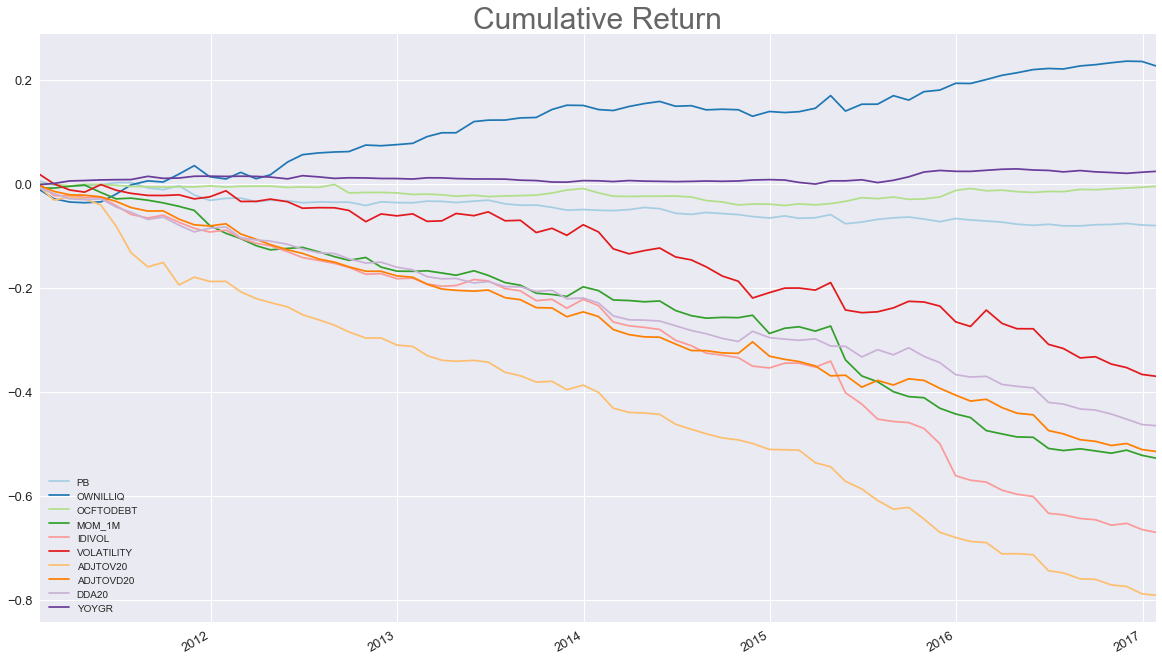

In [566]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
returnofFactor.cumsum().plot(figsize=(20,12),ax=ax,color=sns.color_palette("Paired",10),title ='Cumulative Return',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

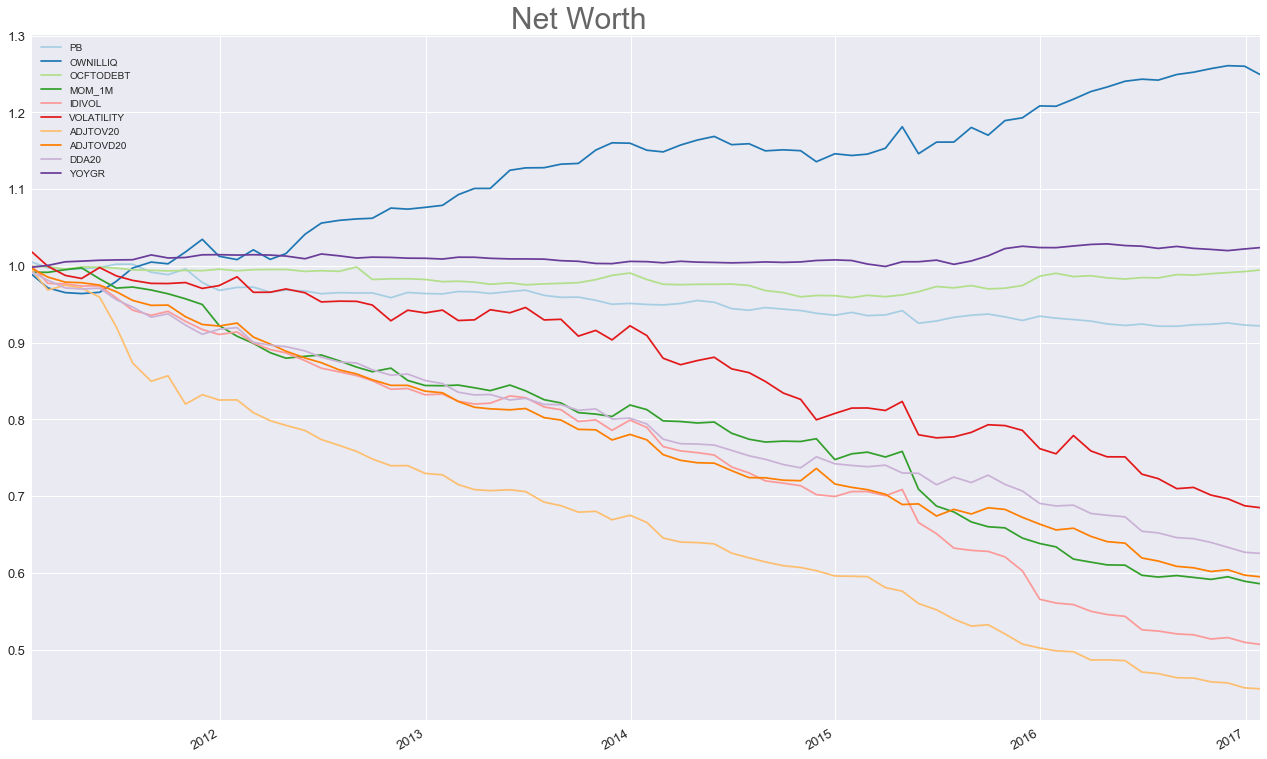

In [567]:
# Net worth plot for each factor
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(returnofFactor+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [568]:
returnofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,-0.001100,0.003105,-0.000067,-0.007223,-0.009177,-0.005067,-0.010834,-0.007046,-0.006369,0.000327
std,0.004788,0.009922,0.003756,0.011757,0.012916,0.014046,0.011836,0.008766,0.008411,0.002665
min,-0.017717,-0.029742,-0.016298,-0.064967,-0.061560,-0.052713,-0.050925,-0.030238,-0.027931,-0.005415
25%,-0.003027,-0.000982,-0.001810,-0.011014,-0.013732,-0.013263,-0.016265,-0.011372,-0.010234,-0.001302
50%,-0.000622,0.002475,0.000074,-0.005773,-0.007065,-0.004215,-0.009223,-0.007986,-0.007593,-0.000115
75%,0.001913,0.008194,0.001809,-0.000320,-0.002753,0.003788,-0.002650,-0.002489,-0.001526,0.001840
max,0.007558,0.024749,0.012544,0.018601,0.017032,0.031510,0.014975,0.022221,0.019558,0.009281


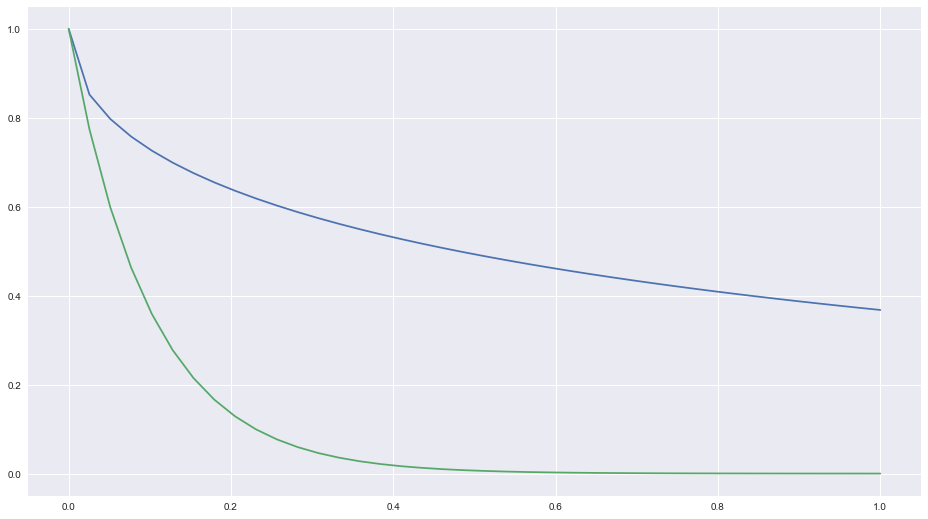

In [569]:
# show how ln function decays 
fig = plt.figure(figsize=(16,9))
x = np.linspace(0,1,40)
y = np.exp(-np.sqrt(x))
y1 = np.exp(-10*x)
plt.plot(x,y)
plt.plot(x,y1)

In [570]:
#
pWeight = np.exp(-7*pValueofFactor.astype(float)).shift(1)

In [571]:
pWeight.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,0.001315,0.993413,0.927434,0.684184,0.999786,1.000000,1.000000,1.000000,0.999996,0.425446
2016-10-31,0.445909,0.486893,0.011422,0.977534,0.512664,0.375660,0.031691,0.720140,0.356738,0.650848
2016-11-30,0.008671,0.795037,0.137668,0.958200,1.000000,1.000000,1.000000,0.999914,0.999870,0.061234
2016-12-30,0.111646,0.330899,0.038540,0.981690,0.625341,0.994199,0.324002,0.496116,0.999906,0.056908
2017-01-26,0.591660,0.004763,0.047523,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.246478


In [572]:
returnofFactor

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2011-01-31,0.00494884,-0.0114236,-0.000593619,-0.00803227,-0.000280226,0.0179463,-0.00606642,-0.00358368,-0.00817338,-0.00156756
2011-02-28,-0.00737529,-0.0173643,-0.000260837,-0.000299739,-0.0224472,-0.0180779,-0.0253712,-0.0109842,-0.0105962,0.00229218
2011-03-31,-0.00213997,-0.00633985,-0.00334536,0.0035274,-0.000833576,-0.0118902,0.00638051,-0.00665747,-0.010188,0.0046867
2011-04-29,0.000880386,-0.00127599,0.00292104,0.00234908,-0.00272149,-0.00404133,-0.00382746,-0.000741765,-0.00139403,0.000856869
2011-05-31,0.00176061,0.00166803,-0.000290825,-0.0143278,0.00026819,0.0144854,-0.0120352,-0.00322406,0.0011733,0.00113973
2011-06-30,0.00426134,0.0149943,-0.00129648,-0.0122488,-0.0162058,-0.0109159,-0.0407951,-0.00885544,-0.0155791,0.000442497
2011-07-29,-7.70491e-05,0.0176059,-0.00219257,0.00139685,-0.016653,-0.00592629,-0.0509252,-0.011706,-0.0100775,0.000230229
2011-08-31,-0.0103591,0.00771919,-0.000582976,-0.00396138,-0.00700727,-0.00396325,-0.027104,-0.00670364,-0.0138261,0.00621825
2011-09-30,-0.00322587,-0.00226184,-0.000806483,-0.00509315,0.00549753,-0.000183277,0.00840259,0.000323857,0.004738,-0.00389251
2011-10-31,0.00755778,0.0153431,0.000667794,-0.00675081,-0.0137325,0.0012987,-0.0431199,-0.015898,-0.0157071,0.000617516


In [573]:
ICweighted = ICFactorTosave * pWeight
#ICweighted.to_csv((path+'IC_Weighted_By_P_Value.csv'))
ICweighted.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
2016-09-30,-0.000122,0.054224,0.038078,0.030675,-0.094346,-0.182835,-0.181844,-0.115164,-0.095488,-0.041234
2016-10-31,-0.015828,0.055305,-0.000439,-0.203089,-0.096822,-0.017091,-0.005058,-0.106783,-0.017219,-0.009252
2016-11-30,-0.000273,-0.025587,0.003607,-0.041626,-0.212289,-0.238105,-0.133867,-0.102742,-0.142358,-0.002285
2016-12-30,0.002385,0.003560,-0.002137,0.082624,-0.015758,-0.261725,-0.067382,-0.023361,-0.123169,-0.009194
2017-01-26,0.070847,0.000173,0.001549,-0.053105,-0.125775,-0.144732,-0.059597,-0.073747,-0.185566,0.041590


In [574]:
totalWeighted = (ReturnTosave * pWeight + ICFactorTosave)
#totalWeighted .to_csv((path+'total_Weighted_By_P_Value.csv'))

In [575]:
pValueofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,ADJTOVD20,DDA20,YOYGR
count,7.300000e+01,7.300000e+01,73.000000,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,73.000000
mean,2.943808e-01,2.052585e-01,0.475836,1.206680e-01,9.832290e-02,1.347023e-01,1.233899e-01,1.344210e-01,1.460269e-01,0.483831
std,2.878987e-01,3.009850e-01,0.302903,2.336416e-01,2.263478e-01,2.822230e-01,2.386025e-01,2.653699e-01,2.468448e-01,0.313008
min,6.343934e-13,2.495654e-22,0.001944,3.174060e-48,5.789506e-52,2.912056e-41,1.366443e-46,4.389893e-36,8.278975e-34,0.000264
25%,4.576865e-02,5.207061e-07,0.192928,3.256168e-08,4.216959e-10,3.893130e-11,2.811709e-11,1.702381e-06,3.773607e-05,0.200069
50%,2.390284e-01,7.205404e-03,0.481031,2.792769e-03,1.046009e-04,4.082865e-04,2.136136e-05,3.997487e-04,2.660614e-03,0.492165
75%,4.350747e-01,3.452031e-01,0.718815,5.639468e-02,6.295815e-02,6.458949e-02,1.009602e-01,1.085155e-01,1.866452e-01,0.762069
max,9.685134e-01,9.947864e-01,0.981691,9.154508e-01,9.847575e-01,9.666090e-01,9.272701e-01,9.805947e-01,9.290136e-01,0.994080


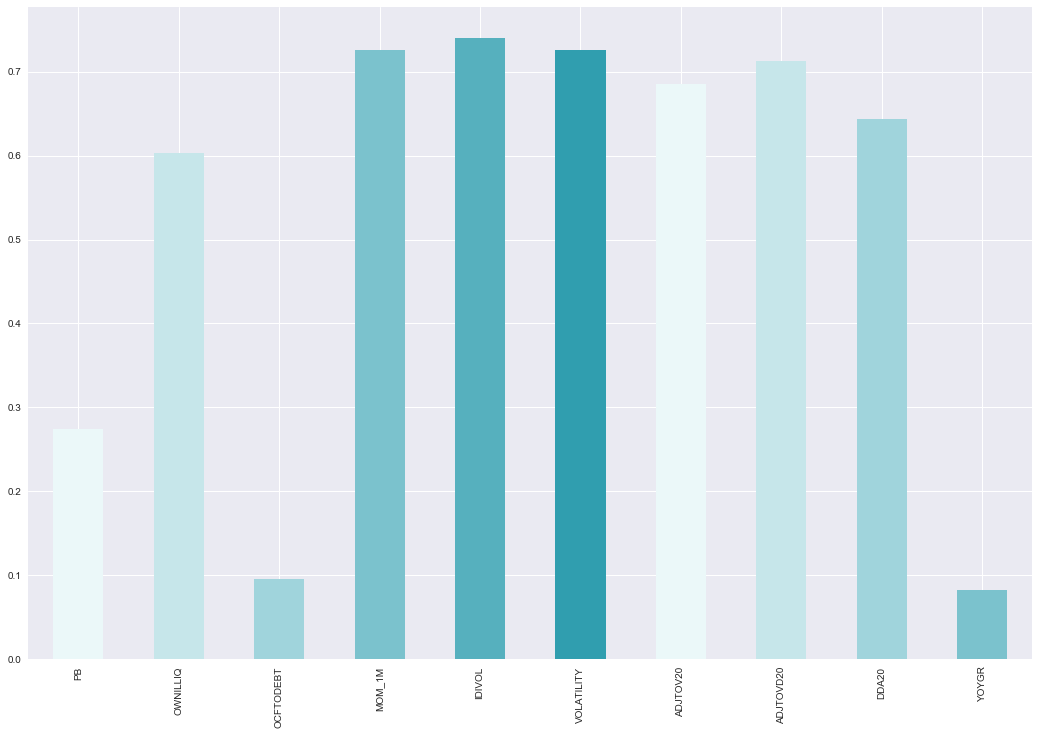

In [576]:
color_set=sns.light_palette((210, 90, 60), input="husl")
(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

In [577]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1)

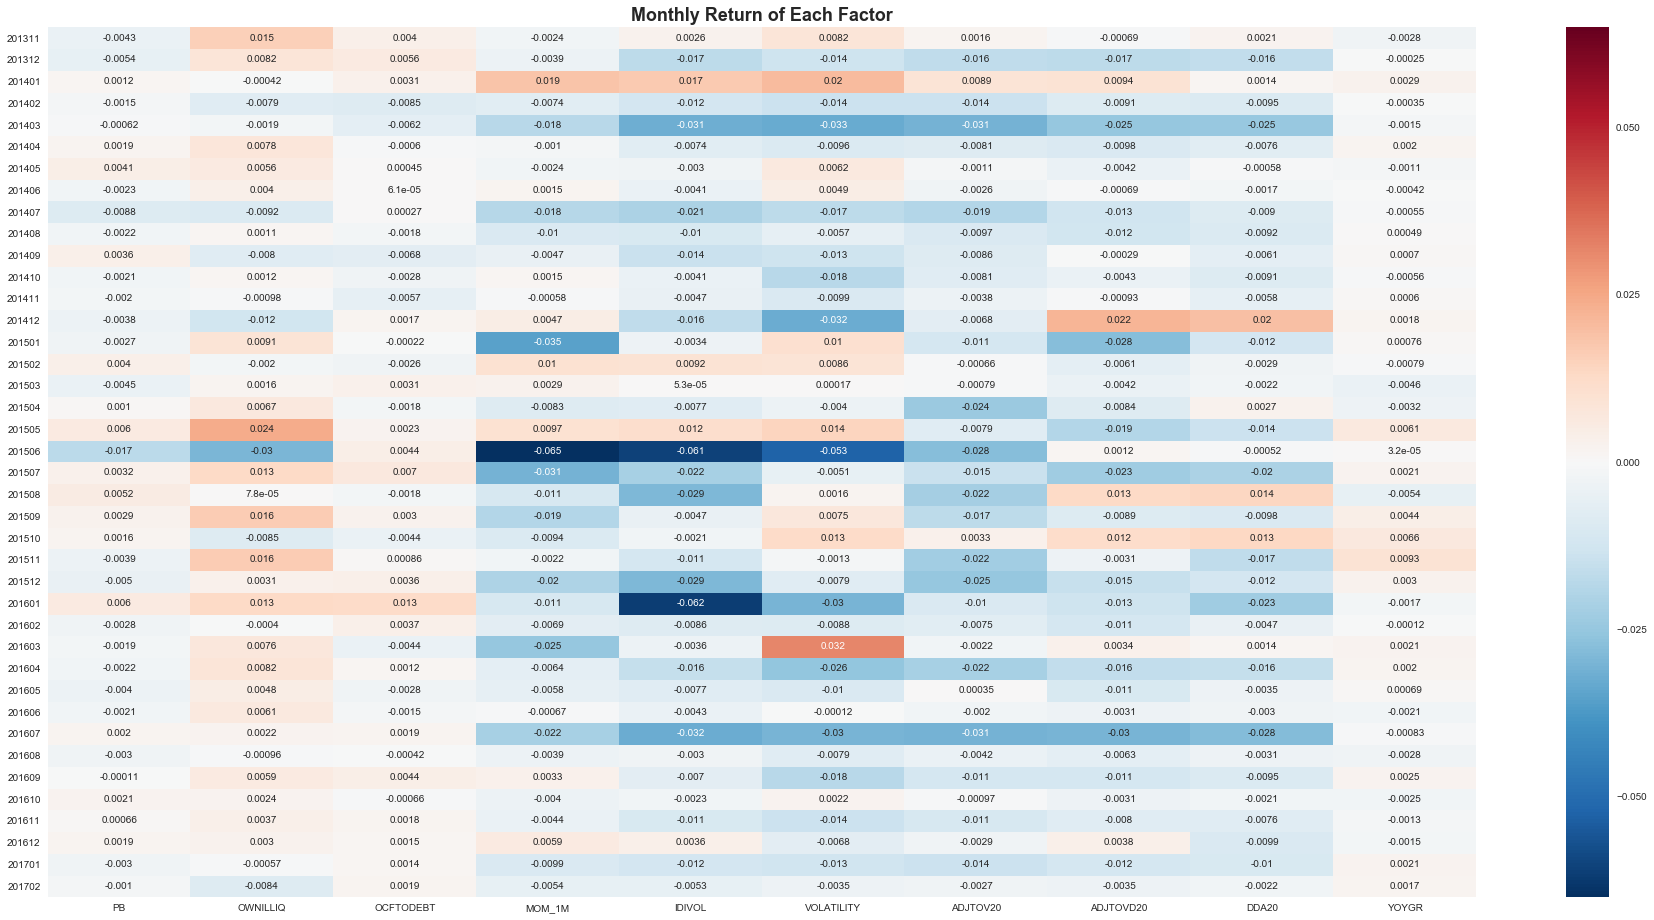

In [578]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(32,16))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of Each Factor',fontsize=18, fontweight='bold')
plt.show()